In [1]:
!nvidia-smi

Tue Jul  6 12:07:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  On   | 00000000:04:00.0 Off |                  N/A |
| 23%   30C    P8     7W / 250W |      1MiB / 11178MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  On   | 00000000:05:00.0 Off |                  N/A |
| 23%   

In [2]:
#!pip3 install -U scikit-learn==0.24.1
#!pip3 install -U scikit-learn==0.20 (final)

You should consider upgrading via the '/homedtic/jrafael/anaconda3/envs/deeplung/bin/python -m pip install --upgrade pip' command.


In [10]:
#!pip3 install -U tensorflow==1.14.0
#!pip3 install -U h5py==2.10.0
#!pip install attention

  Using cached tensorflow-2.5.0-cp36-cp36m-manylinux2010_x86_64.whl (454.3 MB)
  Using cached h5py-3.1.0-cp36-cp36m-manylinux1_x86_64.whl (4.0 MB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 1.14.0


    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-lightning 1.3.4 requires tensorboard!=2.5.0,>=2.2.0, but you have tensorboard 2.5.0 which is incompatible.
pytorch-forecasting 0.9.0 requires scikit-learn<0.25,>=0.23, but you have scikit-learn 0.20.0 which is incompatible.
You should consider upgrading via the '/homedtic/jrafael/anaconda3/envs/deeplung/bin/python -m pip install --upgrade pip' command.


In [1]:
#print(tf.__version__)
#print(keras.__version__)

2.5.0
2.5.0


In [16]:
#!pip uninstall -y tensorflow
#!/homedtic/jrafael/anaconda3/bin/conda uninstall -y tensorflow
#!pip3 install pywrap
#!pip3 install tensorflow

Found existing installation: tensorflow 2.5.0
Uninstalling tensorflow-2.5.0:
  Successfully uninstalled tensorflow-2.5.0


In [27]:
#!pip3 install -U scikit-learn==0.20.0

  Using cached scikit_learn-0.20.0-cp36-cp36m-manylinux1_x86_64.whl (5.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-forecasting 0.9.0 requires scikit-learn<0.25,>=0.23, but you have scikit-learn 0.20.0 which is incompatible.


In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import sklearn
sklearn.__version__

'0.20.0'

In [2]:
import os
import time
import requests
import pandas as pd
import numpy as np
from pickle import load
from datetime import timedelta
import matplotlib.pyplot as plt

In [3]:
from sodapy import Socrata
from sklearn.metrics import mean_absolute_error, mean_squared_error#,mean_absolute_percentage_error

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Lambda, Dot, Activation, Concatenate, Layer
from attention import Attention

In [5]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
        
    return agg

In [ ]:
#LOAD

In [ ]:
#Merge, remove null and na imputation

In [10]:
today = "2021-04-09"

In [11]:
dfInRisk = pd.read_csv("data_flow/inrisk_CAT_" + today + ".csv")

for i,col in enumerate(dfInRisk.columns):
    if i==0:
        dfInRisk[col] = pd.to_datetime(dfInRisk[col])
    else:
        dfInRisk[col] = pd.to_numeric(dfInRisk[col])

dfInRisk.sort_values("date",ascending=True, inplace=True)
dfInRisk["risk_BCN"] = dfInRisk["inrisk_08"]
dfInRisk["risk_GI"] = dfInRisk["inrisk_17"]
dfInRisk["risk_TAR"] = dfInRisk["inrisk_43"]
dfInRisk["risk_LLE"] = dfInRisk["inrisk_25"]
dfInRisk = dfInRisk[["date","risk_BCN","risk_GI","risk_LLE","risk_TAR"]]

print(dfInRisk.shape)
print(dfInRisk.columns)
print(dfInRisk["date"].iloc[-5:])
print(dfInRisk["date"].iloc[0])

(398, 5)
Index(['date', 'risk_BCN', 'risk_GI', 'risk_LLE', 'risk_TAR'], dtype='object')
393   2021-03-15
394   2021-03-16
395   2021-03-17
396   2021-03-18
397   2021-03-19
Name: date, dtype: datetime64[ns]
2020-02-15 00:00:00


In [12]:
# calculate cases by computing the mean of the last 7 days reported cases
cols = dfInRisk.columns
print(cols)
for k in range(1,len(cols)):
    zn = []
    for i in range(dfInRisk.shape[0]):
        acc = 0
        for j in range(7):
            if i-j>=0:
                acc += dfInRisk.iloc[i-j,k]
        zn.append(acc/7)

    dfInRisk[cols[k] + "_7"] = zn
    
    #plot
    #plt.figure(figsize=(10,4))    
    #ax = plt.subplot(1,2,1)
    #dfInRisk[["mean"]].plot(ax=ax)
    #ax = plt.subplot(1,2,2)
    #dfInRisk[["mean_7"]].plot(ax=ax)    
    #plt.show()
    #break
    
dfInRisk = dfInRisk[["date","risk_BCN_7","risk_GI_7","risk_LLE_7","risk_TAR_7"]]
dfInRisk

Index(['date', 'risk_BCN', 'risk_GI', 'risk_LLE', 'risk_TAR'], dtype='object')


,date,risk_BCN_7,risk_GI_7,risk_LLE_7,risk_TAR_7
0,2020-02-15,0.072949,0.151855,0.043482,0.102327
1,2020-02-16,0.143009,0.275563,0.075502,0.181203
2,2020-02-17,0.209083,0.381742,0.108660,0.260290
3,2020-02-18,0.279912,0.493185,0.143284,0.343318
4,2020-02-19,0.354539,0.602402,0.179170,0.428768
...,...,...,...,...,...
393,2021-03-15,233.210782,139.892285,68.357402,106.818405
394,2021-03-16,236.485094,141.624650,68.076668,107.634371
395,2021-03-17,239.198669,142.814572,67.596189,107.492742
396,2021-03-18,243.290157,144.225753,67.145308,108.536820


In [13]:
dfCases = pd.read_csv("data_flow/cases_CAT_" + today + ".csv")
dfCases["date"] = pd.to_datetime(dfCases["date"])
dfCases.sort_values("date",ascending=True, inplace=True)

#Aggregate
dfCases["new_cases"] = np.nansum(dfCases[['new_cases_BCN', 'new_cases_GI', 
                                          'new_cases_TAR',"new_cases_LLE"]],axis=1)
dfCases = dfCases[["date","new_cases","new_cases_BCN","new_cases_GI","new_cases_TAR","new_cases_LLE"]]
dfCases["total_cases"] = np.cumsum(dfCases["new_cases"].values)
print(dfCases.shape,dfCases.columns)

(464, 7) Index(['date', 'new_cases', 'new_cases_BCN', 'new_cases_GI', 'new_cases_TAR',
       'new_cases_LLE', 'total_cases'],
      dtype='object')


In [14]:
cols = dfCases.columns
for k in range(1,len(cols)):
    zn = []
    for i in range(dfCases.shape[0]):
        acc = 0
        for j in range(7):
            if i-j>=0:
                acc += dfCases.iloc[i-j,k]
        zn.append(acc/7)

    dfCases[cols[k] + "_7"] = zn

dfCases

,date,new_cases,new_cases_BCN,new_cases_GI,new_cases_TAR,new_cases_LLE,total_cases,new_cases_7,new_cases_BCN_7,new_cases_GI_7,new_cases_TAR_7,new_cases_LLE_7,total_cases_7
0,2020-01-01,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-01-02,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2020-01-03,1,0,0,0,1,1,0.142857,0.000000,0.000000,0.000000,0.142857,0.142857
3,2020-01-04,0,0,0,0,0,1,0.142857,0.000000,0.000000,0.000000,0.142857,0.285714
4,2020-01-05,0,0,0,0,0,1,0.142857,0.000000,0.000000,0.000000,0.142857,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2021-04-04,339,204,43,41,51,537934,900.714286,641.428571,103.857143,52.571429,102.857143,536045.142857
460,2021-04-05,217,130,29,22,36,538151,721.857143,504.428571,85.571429,46.714286,85.142857,536767.000000
461,2021-04-06,171,127,34,4,6,538322,560.857143,384.857143,67.857143,38.857143,69.285714,537327.857143
462,2021-04-07,0,0,0,0,0,538322,391.857143,264.285714,46.428571,29.142857,52.000000,537719.714286


In [15]:
#Forecasting predictions!!

In [16]:
modelNames = [
    "best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base",
    "best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov",
    #"best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.no_regs",
    #"best_model_flow_provs_CAT_21ahead_1_04022021_fixed_no_risk_mov.1",
    #"best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1",    
]

In [17]:
#Get cls

In [18]:
preds_all = []
for cls in modelNames:

    fname = cls
    print("\n"+fname)


    #Read data
    dfAll = pd.merge(dfCases[["date","new_cases","total_cases","new_cases_7",
                             "new_cases_GI_7","new_cases_LLE_7","new_cases_BCN_7","new_cases_TAR_7"]],
                     dfInRisk[["date","risk_BCN_7","risk_GI_7","risk_LLE_7","risk_TAR_7"]], 
                     how="left",on="date")
    dfAll["date"] = pd.to_datetime(dfAll["date"])

    #Remove days without mobility index 
    dfAll = dfAll.iloc[121:]

    #Remove last day 
    dfAll = dfAll.iloc[:-20]#-20

    #Na inputation
    dfAll.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True, order=2)


    dateIni = str(dfAll.iloc[0]["date"])[:-9]
    dateFi = str(dfAll.iloc[-1]["date"])[:-9]
    print(dateIni, dateFi)

    #Convert data to format (rows,timepoints,features)
    if "base" in fname:
        cols = ['new_cases']    
    elif "no_regs" in fname:
        cols = ['new_cases','new_cases_7',
         'risk_BCN_7',
         'risk_GI_7',
         'risk_LLE_7',
         'risk_TAR_7'
        ]
    elif "mov" in fname:
        cols= [         
         'new_cases',
         'risk_BCN_7',
         'risk_GI_7',
         'risk_LLE_7',
         'risk_TAR_7'
        ]
        
    print(cols)
    ncols=len(cols)
    res = series_to_supervised(dfAll.loc[:,cols].values,7,7)   
    THR = int(res.shape[0]*0.1)

    #Patition train/test
    data_X = res.iloc[:,:(7*ncols)].values.reshape(-1,7,ncols)
    real_all = res.iloc[:,[(7*ncols)+(ncols*i) for i in range(7)]].values.reshape(-1,7)
    data_y = res.iloc[:,[(ncols*7)+(ncols*i) for i in range(7)]].values.reshape(-1,7)
    #print(data_X[353,:,0])

    # normalize features
    scalers_X = []
    for i in range(data_X.shape[-1]):
        print(fname + "_scaler_tr_X_" + str(i)+'.pkl')
        scaler = load(open("models/"+ fname + "_scaler_tr_X_" + str(i)+'.pkl', 'rb'))
        data_X[:,:,i] = scaler.transform(data_X[:,:,i])
    scaler_y = load(open("models/"+ fname + "_scaler_tr_Y.pkl", 'rb'))

    #Evaluate
    preds_region = []
    for cc in range(5):
        print("Loading...", "models/"+ fname + "_" + str(cc) +'.h5')
        model = tf.keras.models.load_model("models/"+ fname + "_" + str(cc) +'.h5')
        preds = model.predict(data_X)
        preds_region.append(scaler_y.inverse_transform(preds))
        
    
    preds_region = np.array(preds_region).reshape(5,data_X.shape[0],data_X.shape[1])
    np.save(os.getcwd()+"/results/res_"+ fname +'.npy', preds_region)
    np.save(os.getcwd()+"/results/real_"+ fname +'.npy', data_y)
    print(preds_region.shape, data_y.shape)


best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base
2020-05-01 2021-03-19
['new_cases']
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base_scaler_tr_X_0.pkl
Loading... models/best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base_0.h5
Loading... models/best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base_1.h5
Loading... models/best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base_2.h5
Loading... models/best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base_3.h5
Loading... models/best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base_4.h5
(5, 310, 7) (310, 7)

best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov
2020-05-01 2021-03-19
['new_cases', 'risk_BCN_7', 'risk_GI_7', 'risk_LLE_7', 'risk_TAR_7']
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov_scaler_tr_X_0.pkl
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov_scaler_tr_X_1.pkl
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov_scaler_tr_X_2.pkl
best_model_flow_provs_CAT_21a

In [19]:
THR

31

In [20]:
# EVALUATION 
# Test: 2021-02-03


best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base
(5, 310, 7) (310, 7)
(310, 7) (310, 7)
(31, 7) (31, 7)
NAN real: 0 NAN pred: 0
0 0
1 31 MAE: 203.2 MAPE: 0.21 CUM-MAE: 1608.59 CUM-MAPE: 0.08 R2: 0.54
0 0
3 31 MAE: 255.2 MAPE: 0.28 CUM-MAE: 4469.56 CUM-MAPE: 0.27 R2: 0.51
0 0
7 31 MAE: 315.0 MAPE: 0.32 CUM-MAE: 5956.83 CUM-MAPE: 0.32 R2: 0.59

best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base

ALL 31 MAE: 212.77 MAPE: 0.19 CUM-MAE: 4146.3 CUM-MAPE: 0.21 R2: 0.81


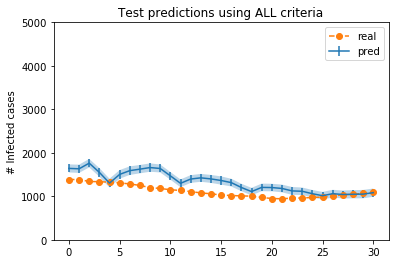

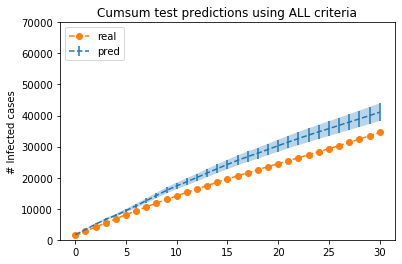


best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov
(5, 310, 7) (310, 7)
(310, 7) (310, 7)
(31, 7) (31, 7)
NAN real: 0 NAN pred: 0
0 0
1 31 MAE: 183.75 MAPE: 0.18 CUM-MAE: 547.22 CUM-MAPE: 0.04 R2: 0.67
0 0
3 31 MAE: 220.9 MAPE: 0.23 CUM-MAE: 1528.09 CUM-MAPE: 0.09 R2: 0.39
0 0
7 31 MAE: 306.05 MAPE: 0.33 CUM-MAE: 5311.22 CUM-MAPE: 0.26 R2: 0.32

best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov

ALL 31 MAE: 138.15 MAPE: 0.13 CUM-MAE: 2235.14 CUM-MAPE: 0.09 R2: 0.72


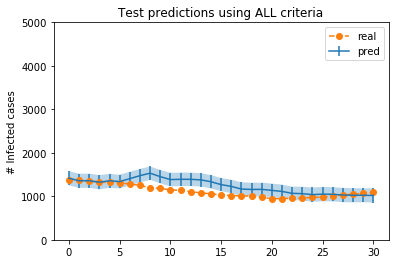

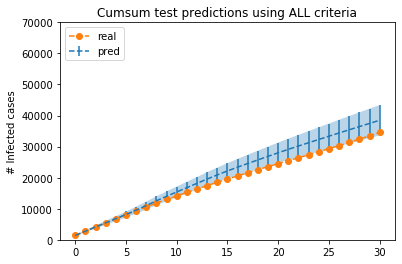

,cls,dayPred,mae,mae_s,mape,mape_s,maeAcc,maeAcc_s,mapeAcc,mapeAcc_s,r2
0,best_model_flow_provs_CAT_21ahead_1_04022021_f...,1,203.20,156.19,0.21,0.19,1608.59,935.70,0.08,0.03,0.54
1,best_model_flow_provs_CAT_21ahead_1_04022021_f...,3,255.20,222.84,0.28,0.29,4469.56,2114.51,0.27,0.10,0.51
2,best_model_flow_provs_CAT_21ahead_1_04022021_f...,7,315.00,190.00,0.32,0.22,5956.83,2973.90,0.32,0.05,0.59
3,best_model_flow_provs_CAT_21ahead_1_04022021_f...,-1,212.77,136.44,0.19,0.12,4146.30,2136.35,0.21,0.02,0.81
4,best_model_flow_provs_CAT_21ahead_1_04022021_f...,1,183.75,120.61,0.18,0.14,547.22,344.43,0.04,0.04,0.67
5,best_model_flow_provs_CAT_21ahead_1_04022021_f...,3,220.90,157.04,0.23,0.21,1528.09,1063.55,0.09,0.07,0.39
6,best_model_flow_provs_CAT_21ahead_1_04022021_f...,7,306.05,217.80,0.33,0.29,5311.22,3097.67,0.26,0.09,0.32
7,best_model_flow_provs_CAT_21ahead_1_04022021_f...,-1,138.15,101.30,0.13,0.09,2235.14,1564.32,0.09,0.05,0.72


In [29]:
plot = False
perfAll = []
for cls in modelNames[:]:
    print()
    print(cls)

    #Preds data
    fname = cls
    real = np.load("results/real_"+ fname +'.npy')
    res = np.load("results/res_"+ fname +'.npy')
    print(res.shape,real.shape)
    pred = np.nanmean(res, axis=0)
    pred_s = np.nanstd(res, axis=0)*2
    print(real.shape,pred.shape)
    
    #Filter test
    pred = pred[-THR:,:]
    real = real[-THR:,:]
    print(real.shape,pred.shape)
    print("NAN real:", np.sum(np.isnan(real)),"NAN pred:", np.sum(np.isnan(pred)))
    
    nulls = []
    for j in [0,2,6]:        
        result = []          
        for i in range(pred.shape[0]):
            if not np.isnan(pred[i,j]) and not np.isnan(real[i,j]):
                p = pred[i,j]
                ps = pred_s[i,j]
                r = real[i,j]
                result.append([-999,i,j,p,r,ps])
            else:
                nulls.append([i,j])
        result = np.array(result)
        print(np.sum(np.isnan(result[:,3].astype(float))), np.sum(np.isnan(result[:,4].astype(float))))
        
        #Daily
        mae = np.nanmean(np.abs(result[:,4]-result[:,3]))
        mape = np.nanmean(np.abs(result[:,4]-result[:,3])/(result[:,4]+1e-5))
        mae_s = np.nanstd(np.abs(result[:,4]-result[:,3]))
        mape_s = np.nanstd(np.abs(result[:,4]-result[:,3])/(result[:,4]+1e-5))            
        r2 = np.corrcoef(result[:,4].astype(float),result[:,3].astype(float))[0,1]

        #CumSum
        realAcc = np.nancumsum(result[:,4])
        predAcc = np.nancumsum(result[:,3])
        maeAcc = np.nanmean(np.abs(realAcc-predAcc))
        mapeAcc = np.nanmean(np.abs(realAcc-predAcc)/(realAcc+1e-5))
        maeAcc_s = np.nanstd(np.abs(realAcc-predAcc))
        mapeAcc_s = np.nanstd(np.abs(realAcc-predAcc)/(realAcc+1e-5))
        print(j+1, len(result), 
              "MAE:",np.round(mae,2),
              "MAPE:",np.round(mape,2),
              "CUM-MAE:",np.round(maeAcc,2),
              "CUM-MAPE:", np.round(mapeAcc,2),
              "R2:", np.round(r2,2)
             )

        if mapeAcc > 1000:
            print("ERROR!!")
            print(realAcc)
            print(predAcc)
            break

        if plot and j in [0]:
            plt.plot(result[:,3],label="pred")
            plt.plot(result[:,4],label="real")
            plt.title("Test predictions at " + str(j+1) + "day")
            plt.ylabel("# Infected cases")
            plt.ylim(0,2000)
            plt.legend()
            plt.show()

        perfAll.append([cls,j+1,len(real), np.round(mae,2), np.round(mape,2),
                        np.round(mae_s,2), np.round(mape_s,2),
                        np.round(maeAcc,2),np.round(mapeAcc,2), 
                        np.round(maeAcc_s,2),np.round(mapeAcc_s,2), 
                        np.round(r2,2)])
    
    #Performance of summing all 21 predictions during the test period
    result = []
    for i in range(pred.shape[0]):            
        p=0
        ps=0
        r=0
        dim=0 + 1e-5
        for j in range(7):
            if not np.isnan(real[i,j]) and not np.isnan(pred[i,j]):
                p += pred[i,j]
                ps += pred_s[i,j]
                r += real[i,j]
                dim += 1
        result.append([-999,i,p/dim,r/dim,ps/dim])

    result = np.array(result)

    #Daily
    mae = np.nanmean(np.abs(result[:,3]-result[:,2]))
    mape = np.nanmean(np.abs(result[:,3]-result[:,2])/(result[:,3]+1e-5))
    mae_s = np.nanstd(np.abs(result[:,3]-result[:,2]))
    mape_s = np.nanstd(np.abs(result[:,3]-result[:,2])/(result[:,3]+1e-5))        
    r2 = np.corrcoef(result[:,3].astype(float),result[:,2].astype(float))[0,1]

    #CumSum
    realAcc = np.nancumsum(result[:,3])
    predAcc = np.nancumsum(result[:,2])
    predAcc_s = np.nancumsum(result[:,4])
    maeAcc = np.nanmean(np.abs(realAcc-predAcc))
    mapeAcc = np.nanmean(np.abs(realAcc-predAcc)/(realAcc+1e-5))
    maeAcc_s = np.nanstd(np.abs(realAcc-predAcc))
    mapeAcc_s = np.nanstd(np.abs(realAcc-predAcc)/(realAcc+1e-5))
    perfAll.append([cls,-1,len(real), np.round(mae,2), np.round(mape,2),
                    np.round(mae_s,2), np.round(mape_s,2),
                    np.round(maeAcc,2),np.round(mapeAcc,2),
                    np.round(maeAcc_s,2),np.round(mapeAcc_s,2),np.round(r2,2)]) 
    print()
    print(cls)
    print()
    print("ALL", len(result), 
          "MAE:",np.round(mae,2),
          "MAPE:",np.round(mape,2),
          "CUM-MAE:",np.round(maeAcc,2),
          "CUM-MAPE:", np.round(mapeAcc,2),
          "R2:", np.round(r2,2)
         )

    #Results
    plt.errorbar(x=range(len(result)),y=result[:,2],label="pred",yerr=result[:,4])
    x=range(len(result))
    y=result[:,2].astype(float)
    y[np.isnan(y)]=0
    error=result[:,4].astype(float)
    error[np.isnan(error)]=0
    plt.fill_between(x, y-error, y+error,alpha=0.3)    
    plt.plot(result[:,3], label="real", linestyle='dashed', marker='o')
    plt.title("Test predictions using ALL criteria")
    plt.ylabel("# Infected cases")
    plt.ylim(0,5000)
    plt.legend()
    plt.show()
    
    plt.errorbar(x=range(len(predAcc_s)),y=result[:,2].cumsum(),label="pred",yerr=predAcc_s, linestyle='dashed')#, marker='.'
    x=range(len(predAcc_s))
    y=result[:,2].cumsum().astype(float)
    y[np.isnan(y)]=0
    error=predAcc_s.astype(float)
    error[np.isnan(error)]=0
    plt.fill_between(x, y-error, y+error,alpha=0.3)    
    plt.plot(result[:,3].cumsum(),label="real", linestyle='dashed', marker='o')
    plt.title("Cumsum test predictions using ALL criteria")
    plt.ylabel("# Infected cases")
    plt.ylim(0,70000)
    plt.legend(loc="upper left")    
    plt.show()
    

dfPerf = pd.DataFrame(perfAll, columns=["cls","dayPred","num","mae","mape","mae_s","mape_s",
                                        "maeAcc","mapeAcc","maeAcc_s","mapeAcc_s","r2"])
dfPerf[["cls","dayPred","mae","mae_s","mape","mape_s","maeAcc","maeAcc_s","mapeAcc","mapeAcc_s","r2"]]

In [22]:
#R2 std
plot = True
r2All = []
for cls in modelNames[:]:
    print()
    print(cls)

    #Preds data
    fname = cls
    real = np.load("results/real_"+ fname +'.npy')
    res = np.load("results/res_"+ fname +'.npy')
    print(res.shape,real.shape)

    
    nulls = []
    for k in range(res.shape[0]):
        pred = res[k]
        
        #Filter test
        pred = pred[-THR:,:]
        real = real[-THR:,:]

        for j in [0,2,6]:        
            result = []          
            for i in range(pred.shape[0]):
                if not np.isnan(pred[i,j]) and not np.isnan(real[i,j]):
                    p = pred[i,j]
                    r = real[i,j]
                    result.append([-999,i,j,p,r])
                else:
                    nulls.append([i,j])
            result = np.array(result)

            #Daily          
            r2 = np.corrcoef(result[:,4].astype(float),result[:,3].astype(float))[0,1]
            r2All.append([cls,j+1,len(real), np.round(r2,2)])

        #Performance of summing all 21 predictions during the test period
        result = []
        for i in range(pred.shape[0]):            
            p=0
            r=0
            dim=0 + 1e-5
            for j in range(7):
                if not np.isnan(real[i,j]) and not np.isnan(pred[i,j]):
                    p += pred[i,j]
                    r += real[i,j]
                    dim += 1
            result.append([-999,i,p/dim,r/dim])

        result = np.array(result)

        #Daily       
        r2 = np.corrcoef(result[:,3].astype(float),result[:,2].astype(float))[0,1]
        r2All.append([cls,-1,len(real), np.round(r2,2)]) 

r2All = pd.DataFrame(r2All,columns=["cls","dayPred","len","r2"])
grp1 = r2All.groupby(["cls","dayPred","len"]).agg(["mean","std"]).reset_index()
grp1


best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base
(5, 310, 7) (310, 7)

best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov
(5, 310, 7) (310, 7)


cls dayPred len     r2  \
                                                                   mean   
0  best_model_flow_provs_CAT_21ahead_1_04022021_f...      -1  31  0.798   
1  best_model_flow_provs_CAT_21ahead_1_04022021_f...       1  31  0.538   
2  best_model_flow_provs_CAT_21ahead_1_04022021_f...       3  31  0.502   
3  best_model_flow_provs_CAT_21ahead_1_04022021_f...       7  31  0.592   
4  best_model_flow_provs_CAT_21ahead_1_04022021_f...      -1  31  0.664   
5  best_model_flow_provs_CAT_21ahead_1_04022021_f...       1  31  0.594   
6  best_model_flow_provs_CAT_21ahead_1_04022021_f...       3  31  0.344   
7  best_model_flow_provs_CAT_21ahead_1_04022021_f...       7  31  0.296   

             
        std  
0  0.008367  
1  0.067231  
2  0.076616  
3  0.047645  
4  0.198318  
5  0.096592  
6  0.086776  
7  0.062690

In [27]:
grp = dfPerf[["cls","dayPred","r2"]].groupby(["cls","dayPred"]).agg(["mean","std"]).reset_index()
grp["r2_m"] = grp["r2"]["mean"]
grp["r2_m"] = grp["r2_m"].astype(float)
pvt = pd.pivot(grp, index=["cls"],columns="dayPred",values="r2_m")
display(pvt)
display(pvt.mean(axis=1).round(2))
display(pvt.std(axis=1).round(2))

dayPred,-1,1,3,7
cls,,,,
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base,0.81,0.54,0.51,0.59
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov,0.72,0.67,0.39,0.32


cls
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base    0.61
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov     0.52
dtype: float64

cls
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base    0.14
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov     0.20
dtype: float64

array([0.81, 0.72])

array([0.0083666 , 0.19831793])

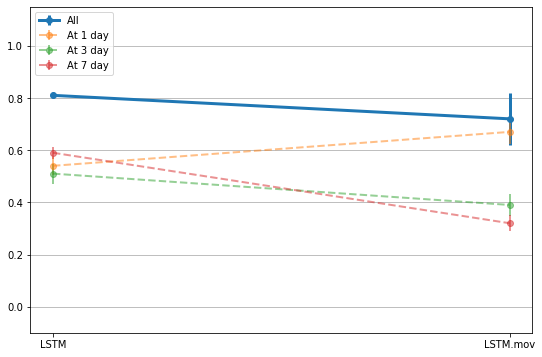

In [28]:
y = pd.DataFrame(pvt.T.reset_index(drop=False))
y["LSTM"]= y["best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base"]
y["LSTM.mov"]= y["best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov"]
yAll = y[y["dayPred"]==-1]
y1 = y[y["dayPred"]==1]
y3 = y[y["dayPred"]==3]
y7 = y[y["dayPred"]==7]

yAll = yAll[["LSTM","LSTM.mov"]].T[0].values
y1 = y1[["LSTM","LSTM.mov"]].T[1].values
y3 = y3[["LSTM","LSTM.mov"]].T[2].values
y7 = y7[["LSTM","LSTM.mov"]].T[3].values
display(yAll)

error = grp1
error["LSTM"]= error["cls"]=="best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base"
error["LSTM.mov"]= error["cls"]=="best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov"

errorAll = error[error["dayPred"]==-1]
error1 = error[error["dayPred"]==1]
error3 = error[error["dayPred"]==3]
error7 = error[error["dayPred"]==7]

errorAll = errorAll["r2"]["std"].values
error1 = error1["r2"]["std"].values
error3 = error3["r2"]["std"].values
error7 = error7["r2"]["std"].values
display(errorAll)

plt.figure(figsize=(9,6))
plt.errorbar(range(len(yAll)), yAll, errorAll/2., label="All", linestyle='-', marker='o', linewidth=3)
plt.errorbar(range(len(y1)), y1, error1/2., label="At 1 day", linestyle='--', marker='o', linewidth=2,alpha=0.5)
plt.errorbar(range(len(y3)), y3, error3/2., label="At 3 day", linestyle='--', marker='o', linewidth=2,alpha=0.5)
plt.errorbar(range(len(y7)), y7, error7/2., label="At 7 day", linestyle='--', marker='o', linewidth=2,alpha=0.5)

plt.xticks(range(len(yAll)),["LSTM","LSTM.mov"])
plt.ylim(-0.1,1.15)
plt.legend(loc="upper left")
plt.grid(axis='y')
plt.show()

In [29]:
grp = dfPerf[["cls","dayPred","mae","mae_s"]].groupby(["cls","dayPred"]).agg(["mean"]).reset_index()
display(grp)
grp["mae_m"] = grp["mae"]["mean"]
grp["mae_m"] = grp["mae_m"].astype(float)
grp["mae_ss"] = grp["mae_s"]["mean"]
grp["mae_ss"] = grp["mae_ss"].astype(float)
pvt = pd.pivot(grp, index=["cls"],columns="dayPred",values="mae_m")
display(pvt)
pvt = pd.pivot(grp, index=["cls"],columns="dayPred",values="mae_ss")
display(pvt)
#display(pvt.mean(axis=1).round(2))
#display(pvt.std(axis=1).round(2))

,cls,dayPred,mae,mae_s
,,,mean,mean
0,best_model_flow_provs_CAT_21ahead_1_04022021_f...,-1,212.77,136.44
1,best_model_flow_provs_CAT_21ahead_1_04022021_f...,1,203.20,156.19
2,best_model_flow_provs_CAT_21ahead_1_04022021_f...,3,255.20,222.84
3,best_model_flow_provs_CAT_21ahead_1_04022021_f...,7,315.00,190.00
4,best_model_flow_provs_CAT_21ahead_1_04022021_f...,-1,138.15,101.30
5,best_model_flow_provs_CAT_21ahead_1_04022021_f...,1,183.75,120.61
6,best_model_flow_provs_CAT_21ahead_1_04022021_f...,3,220.90,157.04
7,best_model_flow_provs_CAT_21ahead_1_04022021_f...,7,306.05,217.80


dayPred,-1,1,3,7
cls,,,,
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base,212.77,203.20,255.2,315.00
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov,138.15,183.75,220.9,306.05


dayPred,-1,1,3,7
cls,,,,
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base,136.44,156.19,222.84,190.0
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov,101.30,120.61,157.04,217.8


array([212.77, 138.15])

array([136.44, 101.3 ])

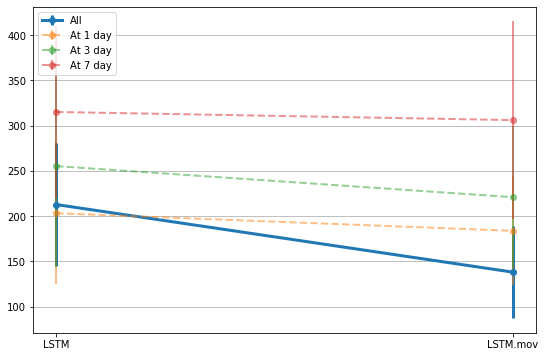

In [30]:
pvt = pd.pivot(grp, index=["cls"],columns="dayPred",values="mae_m")
y = pd.DataFrame(pvt.T.reset_index(drop=False))
y["LSTM"]= y["best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base"]
y["LSTM.mov"]= y["best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov"]
yAll = y[y["dayPred"]==-1]
y1 = y[y["dayPred"]==1]
y3 = y[y["dayPred"]==3]
y7 = y[y["dayPred"]==7]

yAll = yAll[["LSTM","LSTM.mov"]].T[0].values
y1 = y1[["LSTM","LSTM.mov"]].T[1].values
y3 = y3[["LSTM","LSTM.mov"]].T[2].values
y7 = y7[["LSTM","LSTM.mov"]].T[3].values
display(yAll)

pvt = pd.pivot(grp, index=["cls"],columns="dayPred",values="mae_ss")
error = pd.DataFrame(pvt.T.reset_index(drop=False))
error["LSTM"]= error["best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base"]
error["LSTM.mov"]= error["best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov"]

errorAll = error[error["dayPred"]==-1]
error1 = error[error["dayPred"]==1]
error3 = error[error["dayPred"]==3]
error7 = error[error["dayPred"]==7]

errorAll = errorAll[["LSTM","LSTM.mov"]].T[0].values
error1 = error1[["LSTM","LSTM.mov"]].T[1].values
error3 = error3[["LSTM","LSTM.mov"]].T[2].values
error7 = error7[["LSTM","LSTM.mov"]].T[3].values
display(errorAll)

plt.figure(figsize=(9,6))
plt.errorbar(range(len(yAll)), yAll, errorAll/2., label="All", linestyle='-', marker='o', linewidth=3)
plt.errorbar(range(len(y1)), y1, error1/2., label="At 1 day", linestyle='--', marker='o', linewidth=2,alpha=0.5)
plt.errorbar(range(len(y3)), y3, error3/2., label="At 3 day", linestyle='--', marker='o', linewidth=2,alpha=0.5)
plt.errorbar(range(len(y7)), y7, error7/2., label="At 7 day", linestyle='--', marker='o', linewidth=2,alpha=0.5)

plt.xticks(range(len(yAll)),["LSTM","LSTM.mov"])
plt.legend(loc="upper left")
plt.grid(axis='y')
plt.show()

In [31]:
grp = dfPerf[["cls","dayPred","mape","mape_s"]].groupby(["cls","dayPred"]).agg(["mean","std"]).reset_index()
grp["mape_m"] = grp["mape"]["mean"]
grp["mape_m"] = grp["mape_m"].astype(float)
grp["mape_ss"] = grp["mape_s"]["mean"]
grp["mape_ss"] = grp["mape_ss"].astype(float)
pvt = pd.pivot(grp, index=["cls"],columns="dayPred",values="mape_m")
display(pvt)
pvt = pd.pivot(grp, index=["cls"],columns="dayPred",values="mape_ss")
display(pvt)
display(pvt.mean(axis=1).round(2))
display(pvt.std(axis=1).round(2))

dayPred,-1,1,3,7
cls,,,,
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base,0.19,0.21,0.28,0.32
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov,0.13,0.18,0.23,0.33


dayPred,-1,1,3,7
cls,,,,
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base,0.12,0.19,0.29,0.22
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov,0.09,0.14,0.21,0.29


cls
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base    0.20
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov     0.18
dtype: float64

cls
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base    0.07
best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov     0.09
dtype: float64

array([0.19, 0.13])

array([0.12, 0.09])

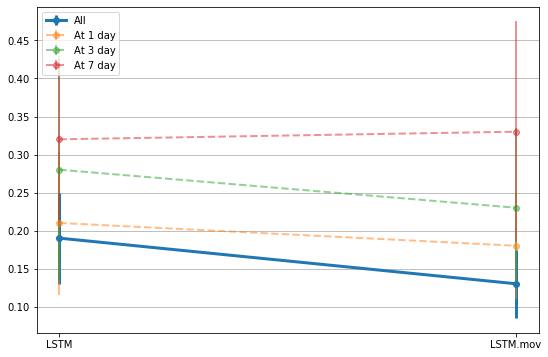

In [120]:
pvt = pd.pivot(grp, index=["cls"],columns="dayPred",values="mape_m")
y = pd.DataFrame(pvt.T.reset_index(drop=False))
y["LSTM"]= y["best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base"]
y["LSTM.mov"]= y["best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov"]
yAll = y[y["dayPred"]==-1]
y1 = y[y["dayPred"]==1]
y3 = y[y["dayPred"]==3]
y7 = y[y["dayPred"]==7]

yAll = yAll[["LSTM","LSTM.mov"]].T[0].values
y1 = y1[["LSTM","LSTM.mov"]].T[1].values
y3 = y3[["LSTM","LSTM.mov"]].T[2].values
y7 = y7[["LSTM","LSTM.mov"]].T[3].values
display(yAll)

pvt = pd.pivot(grp, index=["cls"],columns="dayPred",values="mape_ss")
error = pd.DataFrame(pvt.T.reset_index(drop=False))
error["LSTM"]= error["best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base"]
error["LSTM.mov"]= error["best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov"]

errorAll = error[error["dayPred"]==-1]
error1 = error[error["dayPred"]==1]
error3 = error[error["dayPred"]==3]
error7 = error[error["dayPred"]==7]

errorAll = errorAll[["LSTM","LSTM.mov"]].T[0].values
error1 = error1[["LSTM","LSTM.mov"]].T[1].values
error3 = error3[["LSTM","LSTM.mov"]].T[2].values
error7 = error7[["LSTM","LSTM.mov"]].T[3].values
display(errorAll)

plt.figure(figsize=(9,6))
plt.errorbar(range(len(yAll)), yAll, errorAll/2., label="All", linestyle='-', marker='o', linewidth=3)
plt.errorbar(range(len(y1)), y1, error1/2., label="At 1 day", linestyle='--', marker='o', linewidth=2,alpha=0.5)
plt.errorbar(range(len(y3)), y3, error3/2., label="At 3 day", linestyle='--', marker='o', linewidth=2,alpha=0.5)
plt.errorbar(range(len(y7)), y7, error7/2., label="At 7 day", linestyle='--', marker='o', linewidth=2,alpha=0.5)

plt.xticks(range(len(yAll)),["LSTM","LSTM.mov"])
plt.legend(loc="upper left")
plt.grid(axis='y')
plt.show()

array([0.19, 0.13])

array([0.12, 0.09])

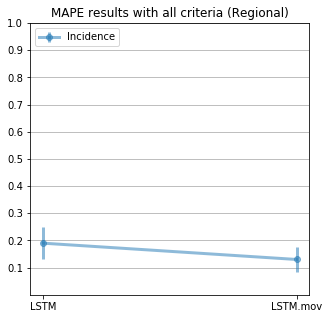

In [37]:
pvt = pd.pivot(grp, index=["cls"],columns="dayPred",values="mape_m")
y = pd.DataFrame(pvt.T.reset_index(drop=False))
y["LSTM"]= y["best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base"]
y["LSTM.mov"]= y["best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov"]
yAll = y[y["dayPred"]==-1]
yAll = yAll[["LSTM","LSTM.mov"]].T[0].values
display(yAll)

pvt = pd.pivot(grp, index=["cls"],columns="dayPred",values="mape_ss")
error = pd.DataFrame(pvt.T.reset_index(drop=False))
error["LSTM"]= error["best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.base"]
error["LSTM.mov"]= error["best_model_flow_provs_CAT_21ahead_1_04022021_fixed.1.mov"]

errorAll = error[error["dayPred"]==-1]
errorAll = errorAll[["LSTM","LSTM.mov"]].T[0].values
display(errorAll)

plt.figure(figsize=(5,5))
plt.errorbar(range(len(yAll)), yAll, yerr=errorAll/2., label="Incidence", linestyle='-', marker='o', 
             linewidth=3, alpha=0.5)
plt.xticks(range(len(yAll)),["LSTM","LSTM.mov"])
plt.yticks([0.1*i for i in range(1,11)])
plt.legend(loc="upper left")
plt.grid(axis='y')
plt.ylim(0,1)
plt.title("MAPE results with all criteria (Regional)")
plt.show()